<a href="https://colab.research.google.com/github/nflorezasu/MAT-421/blob/main/ModuleH_PartB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

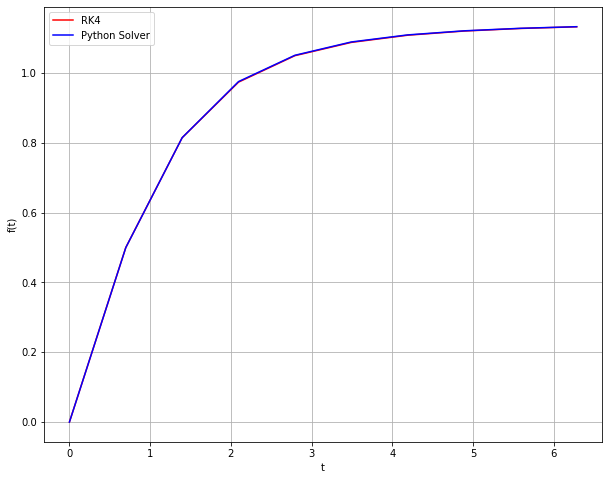

In [21]:
# MAT 421 Spring 2022
# Nickolas Florez
# Module H
# 22.4-22.6

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Function to integrate differential equation using RK4

def myRK4(ds, t_span, s0):
    if (len(t_span) < 2):
        raise BaseException("Error: span must be of length more than 1!")
    # CALCULATIONS
    h = (t_span[-1] - t_span[0]) / (len(t_span) - 1)
    s = np.zeros((len(t_span),1))
    s[0] = s0

    for i in range(0, len(t_span) - 1):
        k1 = ds(t_span[i], s[i]);
        k2 = ds(t_span[i] + 0.5 * h, s[i] + 0.5 * h * k1);
        k3 = ds(t_span[i] + 0.5 * h, s[i] + 0.5 * h * k2);
        k4 = ds(t_span[i] + h, s[i] + h * k3);

        s[i+1] = s[i] + h/6 * (k1 + 2 * k2 + 2 * k3 + k4);
    
    t = t_span
    s = s.transpose()[0]
    return [t, s]

#Code from book: 

f = lambda t, s: np.sin(np.exp(s))/(t+1)
t_span = np.linspace(0, 2*np.pi, 10)
s0 = 0
plt.figure(figsize = (10, 8))
# Runge-Kutta method
t, s = myRK4(f, t_span, s0)
plt.plot(t, s, "r", label="RK4")
# Python solver
sol = solve_ivp(f, [0, 2*np.pi], [s0], t_eval=t)
plt.plot(sol.t, sol.y[0], "b-", label="Python Solver")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.grid()
plt.legend(loc=2)
plt.show()